# Overview
This notebook is used to create a binary classification model that predicts  whether an individual has (pre)diabetes or not based on features regarding their lifestyle and health measurements. The dataset used is the "Diabetes Health Indicators Dataset" which is available at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv. Here is a summary of the Kaggle description of the dataset:

The dataset was originally collected and released by the Behavioral Risk Factor Surveillance System (BRFSS) from the Centers for Disease Control and Prevention (CDC). The original dataset is available in this Kaggle project (https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system). The BRFSS is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. 

This dataset was derived from the 2015 BRFSS survey. The original dataset contains 441455 individuals and has 330 features, where the features are either questions directly asked of participants, or calculated variables based on individual participant responses.

For this notebook, we are using the `diabetes_binary_5050split_health_indicators_BRFSS2015.csv` dataset, which is a clean dataset of 70692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes: 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced. The notebook used by the Kaggle project owner to create this dataset is available at https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook.

The dataset contains 70692 rows and 22 columns. The columns are as follows:

1. Diabetes_binary (float, target): 0 = no diabetes, 1 = prediabetes or diabetes
2. HighBP (float): 0 = no high blood pressure, 1 = high blood pressure
3. HighChol (float): 0 = no high cholesterol, 1 = high cholesterol
4. CholCheck (float): 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
5. BMI (float): Body Mass Index
6. Smoker (float): Have you smoked at least 100 cigarettes in your entire life? 0 = no, 1 = yes
7. Stroke (float): Ever told you had a stroke. 0 = no, 1 = yes
8. HeartDiseaseorAttack (float): Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes
9. PhysActivity (float): Physical activity in past 30 days - not including job. 0 = no, 1 = yes
10. Fruits (float): Consume fruit one or more times per day. 0 = no, 1 = yes
11. Veggies (float): Consume vegetables one or more times per day. 0 = no, 1 = yes
12. HvyAlcoholConsump (float): Adult men drink >=14 drinks per week, or adult women drink >=7 drinks per week. 0 = no, 1 = yes
13. AnyHealthcare (float): Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
14. NoDocbcCost (float): Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
15. GenHlth (float): Would you say that in general your health is: scale 1-5. 
- 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
16. MentHlth (float): Days of poor mental health scale 1-30 days.
17. PhysHlth (float): Physical illness or injury days in past 30 days scale 1-30.
18. DiffWalk (float): Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
19. Sex (float): 0 = female 1 = male
20. Age (float): 13-level age category. 
- 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-76, 13 = 80 or older
21. Education (float): Education level scale 1-6. 
- 1 = never attended school or only kindergarten, 2 = elementary (grades 1 - 8), 3 = some high school (grades 9 - 11), 4 = high school graduate (grade 12 or GED), 5 = some college or technical school (College 1 year to 3 years), 6 = college graduate (college 4 years or more)
22. Income (float): Income scale scale 1-8. 
- 1 = less than $10,000, 2 = $10,000 t0 $15,000, 3 = $15,000 to $20,000, 4 = $20,000 to $25,000, 5 = $25,000 to $35,000, 6 = $35,000 to $50,000, 7 = $50,000 to $75,000, 8 = $75,000 or more


This notebook performs the following steps to create a classification model:
1. Data Exploration
2. Data Preprocessing
3. Model Training and Evaluation



# Install Python Packages/Libraries

Install the specified Python packages. Here's a breakdown of each package:

`joblib`: A set of tools for pipelining Python jobs. It provides utilities for saving and loading Python objects that make it possible to save scikit-learn models in a format that can be used in production.

`matplotlib`: A plotting library for creating visualizations in Python. It is often used in conjunction with other libraries for data analysis and machine learning.

`numpy`: A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

`pandas`: A powerful data manipulation and analysis library. It provides data structures for efficiently storing and manipulating large datasets.

`seaborn`: A statistical data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

`scikit-learn`: A machine learning library that provides simple and efficient tools for data analysis and modeling. It includes various algorithms for classification, regression, clustering, and more.


In [46]:
%pip install joblib==1.3.2 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 plotly==5.15.0 scikit-learn==1.2.2 seaborn==0.13.1 "nbformat>=4.2.0"

Note: you may need to restart the kernel to use updated packages.


# Import Packages/Libraries

In addition to the packages/libraries installed above, we will also imported

`typing`: A module that provides support for type hints. Type hints allow you to specify the type of a variable, function parameter, or return value. This helps improve the readability of your code and allows you to catch errors early.

In [47]:
from typing import List, Tuple

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Data Exploration

We want to explore the data to get a better understanding of the dataset. We will use the pandas library to load the dataset into a pandas DataFrame. A DataFrame is a two-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data, and more) in columns. It is similar to a spreadsheet or an SQL table. The DataFrame object also has powerful built-in methods for exploring and manipulating these data sets. We will first take a look at the structure of the dataset. Then, we want to explore the data to see if there are any missing values and to see if there are any skewness and outliers. We also want to see if there are any correlations between the features and the target variable. We will use the pandas library to load the dataset and the matplotlib and seaborn library to plot the data. 

Load the `diabetes_binary_5050split_health_indicators_BRFSS2015.csv` file into a Pandas DataFrame using the `read_csv()` function. The `read_csv()` function takes in the path to the CSV file as a parameter and returns a DataFrame. 

In [48]:
# TODO: create variable for dataset path
csv_path = ( os.path.join('.','dataset/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
)
# PROVIDED: read dataset into dataframe
df = (
    pd.read_csv(csv_path)  # PROVIDED
)

Display the first 5 rows of the dataframe using `head()` method of the dataframe.

We can see that the data contains some of the columns where some are binary (1s and 0s) and others are floating points. The target variable is the `Diabetes_binary` column. 

In [49]:
# PROVIDED: show the first 5 rows of dataframe
df.head(5)  # PROVIDED


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Obtain a concise summary of the dataframe. The `info()` method provides information about the dataframe, including the index range, the data types of each column, the number of non-null values, and memory usage.

In [50]:
# PROVIDED: show the info of dataframe
df.info()  # PROVIDED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

we can retrieve the columns of the dataframe using the `columns` attribute of the dataframe.

In [51]:
# PROVIDED: show the columns of dataframe
df.columns  # PROVIDED


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Retrieve the dimensions (rows, columns) of the dataframe using the `shape` attribute of the dataframe.

In [52]:
# PROVIDED: retrieve the number of rows and columns
df.shape  # PROVIDED


(70692, 22)

Check and handles missing values in the Pandas DataFrame.

We see that their is no missing values in the dataset.

In [53]:
# PROVIDED: check the number of missing values in each column
print('Missing values in each column:\n', (
       df.isnull().sum()  # PROVIDED
    ), sep='')
print('Original data shape: ', df.shape)


Missing values in each column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Original data shape:  (70692, 22)


Check the number of unique values in each column of dataframe using the `nunique()` method of the dataframe.

In [54]:
# PROVIDED: check the number of unique values in each column
df.nunique()  # PROVIDED


Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Even though many of the columns are numerical values, they are actually binary or categorical values. We will create lists to keep track of the numerical columns, binary columns, categorical columns, and label column. This will be useful when we visualize the data.

In [55]:
# PROVIDED: create list of column names for each data type
label = [
   'Diabetes_binary',  # PROVIDED
]
bin_cols = [
   'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'  # PROVIDED
]
cat_cols = [
    'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'  # PROVIDED
]
num_cols = [
    'BMI'  # PROVIDED
]

We will display pie charts to visualize the distribution of the target `Diabetes_binary` column using the `plot.pie()` method of the dataframe.

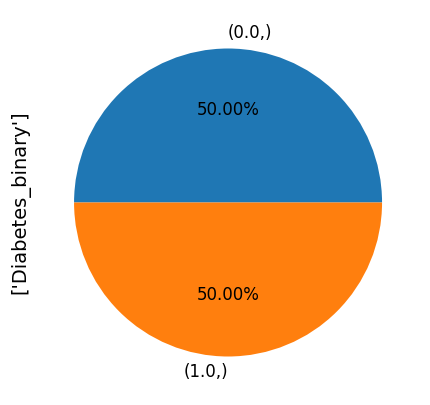

In [56]:
# TODO: set the figure size and background color to white in case your editor GUI uses a dark theme
plt.figure(
    figsize=(5,5
    ),
    facecolor=('white'
    ),
)

# PROVIDED: show the percentage of each category using a pie chart
# plot.pie() plots a pie chart on the figure attached to the current cell
# autopct='%1.2f%%' shows the percentage of each category with 2 decimal places
df[label].value_counts().plot.pie(autopct='%1.2f%%', fontsize=12)  # PROVIDED

plt.ylabel(label, fontsize=14)

plt.show()

We will display pie charts to visualize the distribution of binary feature columns using the `plot.pie()` method of the dataframe.

/var/folders/3w/dx98vqrj12b47sl1fz6810rh0000gn/T/ipykernel_47052/731194498.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


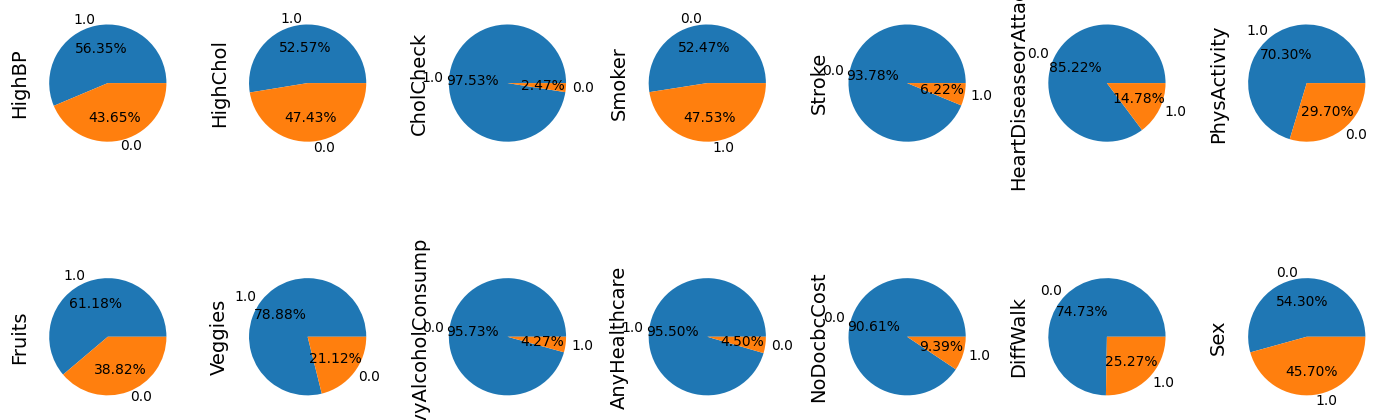

In [57]:
# TODO: set the figure size and background color to white in case your editor GUI uses a dark theme
# fig, axes = plt.subplots(nrows=2, ncols=7,
#     figsize=(14,6
#     ),
#     facecolor=('white'
#     ),
# )
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(14, 6), facecolor='white', constrained_layout=True)

# TODO: iterate over each column name and its corresponding axes object
# to plot the percentage of each binary feature using a pie chart
for ax, col in zip(axes.flatten(), (bin_cols
    # Hint: What is the variable where we put the binary columns?
)):
    # TODO: show the percentage of each category using a pie chart
    # plot.pie() plots a pie chart on the figure attached to the current cell
    # autopct='%1.2f%%' shows the percentage of each category with 2 decimal places
    df[col].value_counts().plot.pie(autopct='%1.2f%%',ax=ax)

    ax.set_ylabel(col, fontsize=14)
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

We will visualize the distribution of the categorical feature columns by using the `plot.bar()` method of the dataframe.

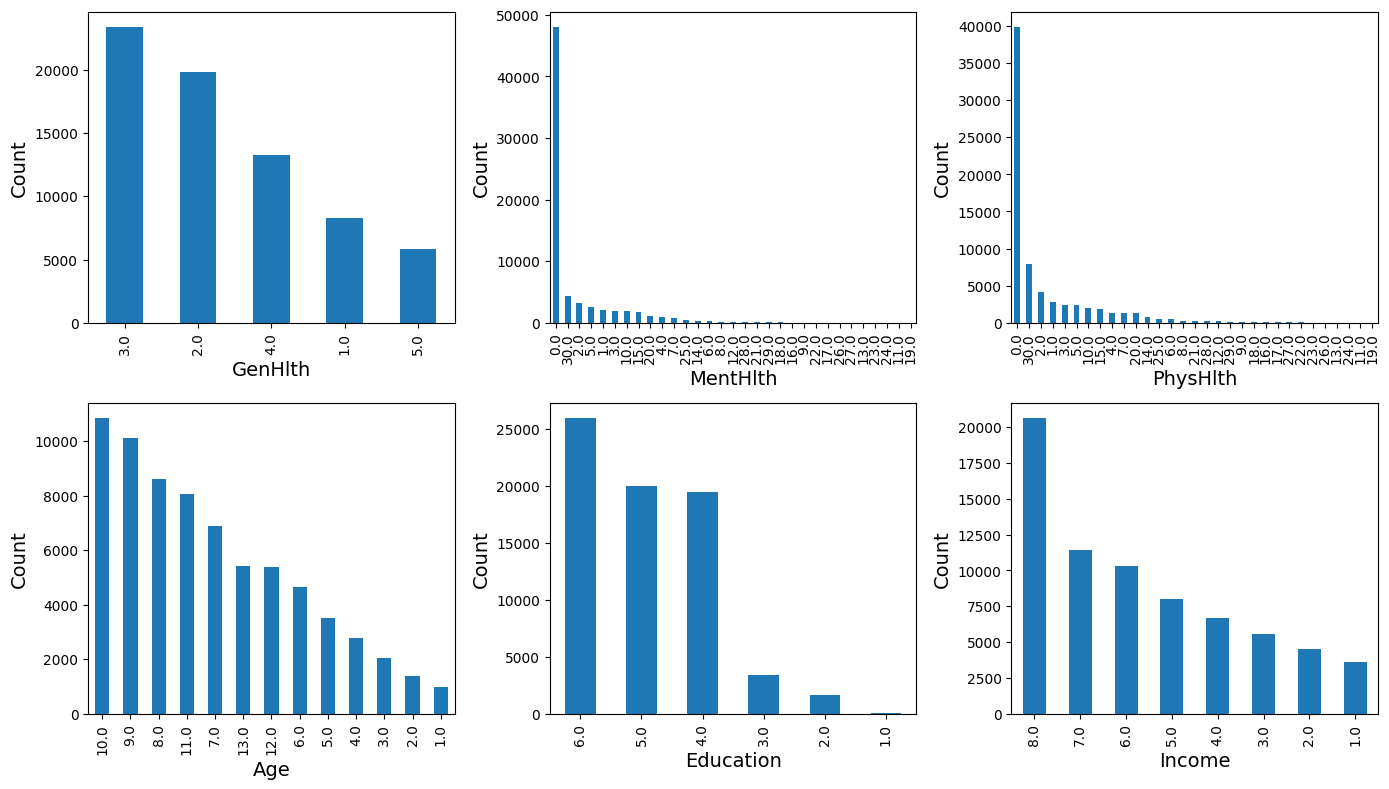

In [58]:
# TODO: set the figure size and background color to white in case your editor GUI uses a dark theme
fig, axes = plt.subplots(nrows=2, ncols=3,
    figsize=(14,8
    ),
    facecolor=('white'
    ),
)

# TODO: iterate over each column name and its corresponding axes object
# to plot the bar plot of each categorical column
for ax, col in zip(axes.flatten(), (cat_cols
    # Hint: What is the variable where we put the categorical columns?
)):
    #TODO: plot the bar plot of how often each categorical column appears
    df[col].value_counts().plot.bar(ax=ax)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xlabel(col, fontsize=14)

plt.tight_layout()
plt.show()

Generate descriptive statistics of the numerical columns in the dataframe using the `describe()` method of the dataframe. The `describe()` method computes summary statistics of numerical columns, including count, mean, standard deviation, minimum, maximum, and the 25, 50, and 75 percentiles. 

In [59]:
# TODO: get the summary statistics of the numerical columns

df[num_cols].describe()
# df.describe()

,BMI
count,70692.000000
mean,29.856985
std,7.113954
min,12.000000
25%,25.000000
50%,29.000000
75%,33.000000
max,98.000000


Visualize the distribution of the numerical columns in the dataframe using the `hist()` method of the dataframe. 

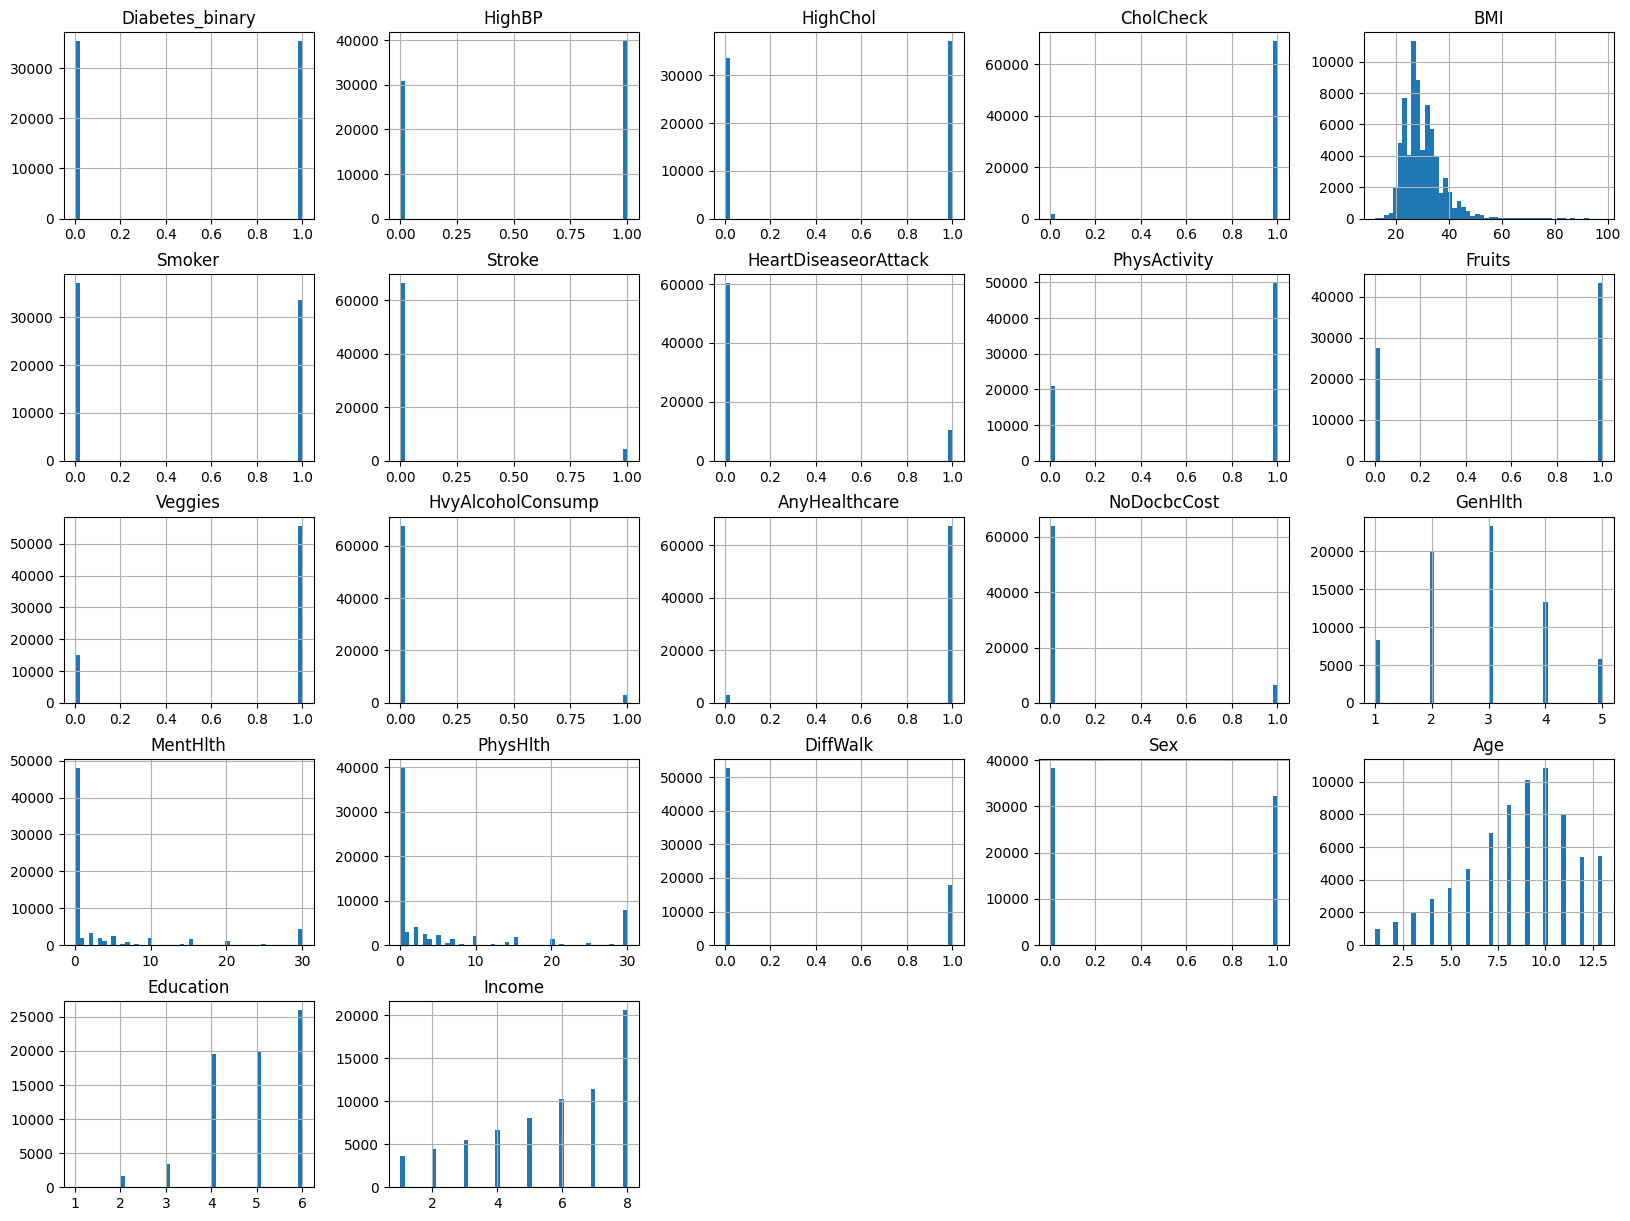

In [60]:
# TODO: plot the distribution for all numerical columns
# bins=50 means to divide the range of values into 50 equal-sized bins
# figsize=(5, 5) means to set the figure size to width=5 and height=5
df.hist(bins=50,figsize=(20,15))
plt.show()

Check for correlation between the features and the target variable using the `corr()` method of the dataframe. The `corr()` method computes pairwise correlation of columns, excluding NA/null values. The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation; when the coefficient is close to -1, it means that there is a strong negative correlation; when it is close to zero, it means that there is no linear correlation.

The correlation matrix is quite large and a bit difficult to read. We will look at the sorted dataframe `Diabetes_binary` column instead in the next cells.

But, at a glance, we can see that the `Diabetes_binary` column has a relatively higher correlation with the `HighBP`, `HighChol`, `BMI`, `GenHlth`, `DiffWalk`,  and `Age` columns.

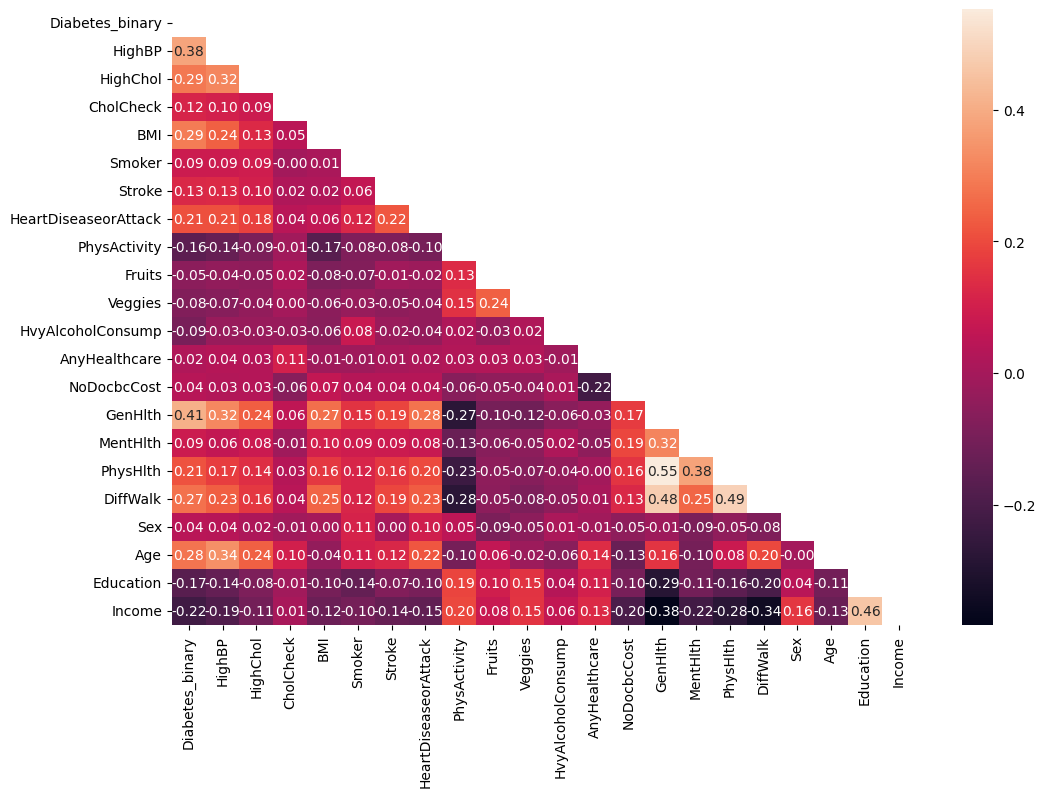

In [61]:
# TODO: create a figure 

plt.figure(figsize=(12,8))


# TODO: compute the correlation matrix using the `.corr()` method
correlation_matrix = df.corr()


# TODO: create a mask to block the upper triangle of the correlation matrix
# as it is a mirror image of the lower triangle
# use `np.triu()` to create an upper triangle matrix of True and False
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# TODO: plot the heatmap using seaborn's `heatmap()` function
# set `annot=True` to show the correlation values on the heatmap
# set `fmt='.2f'` to round the correlation values to 2 decimal places
# set `mask=mask` to block the upper triangle of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', mask=mask)

# show the plot
plt.show()


The correlation matrix can also be viewed as a dataframe to see the correlation coefficients of all the features with each other. Execute the cell below to view the correlation matrix as a dataframe.

In [62]:
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


We can extract the correlation coefficients of the features with the target variable by selecting the column named `Diabetes_binary` from the correlation matrix dataframe. We have sorted that column in descending order to see the features with the highest correlation with the target variable.

In [63]:
diabetes_corr = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print(diabetes_corr)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


We will plot cluster bar charts to visualize the correlation between the binary/categorical features and the target variable using the `countplot()` method of the seaborn library. The `countplot()` method shows the counts of observations in each categorical bin using bars. The x-axis represents the feature and the y-axis represents the count of observations. The color of the bars represents the target variable. We will look at features with at least 0.1 (absolute) correlation with the target variable.

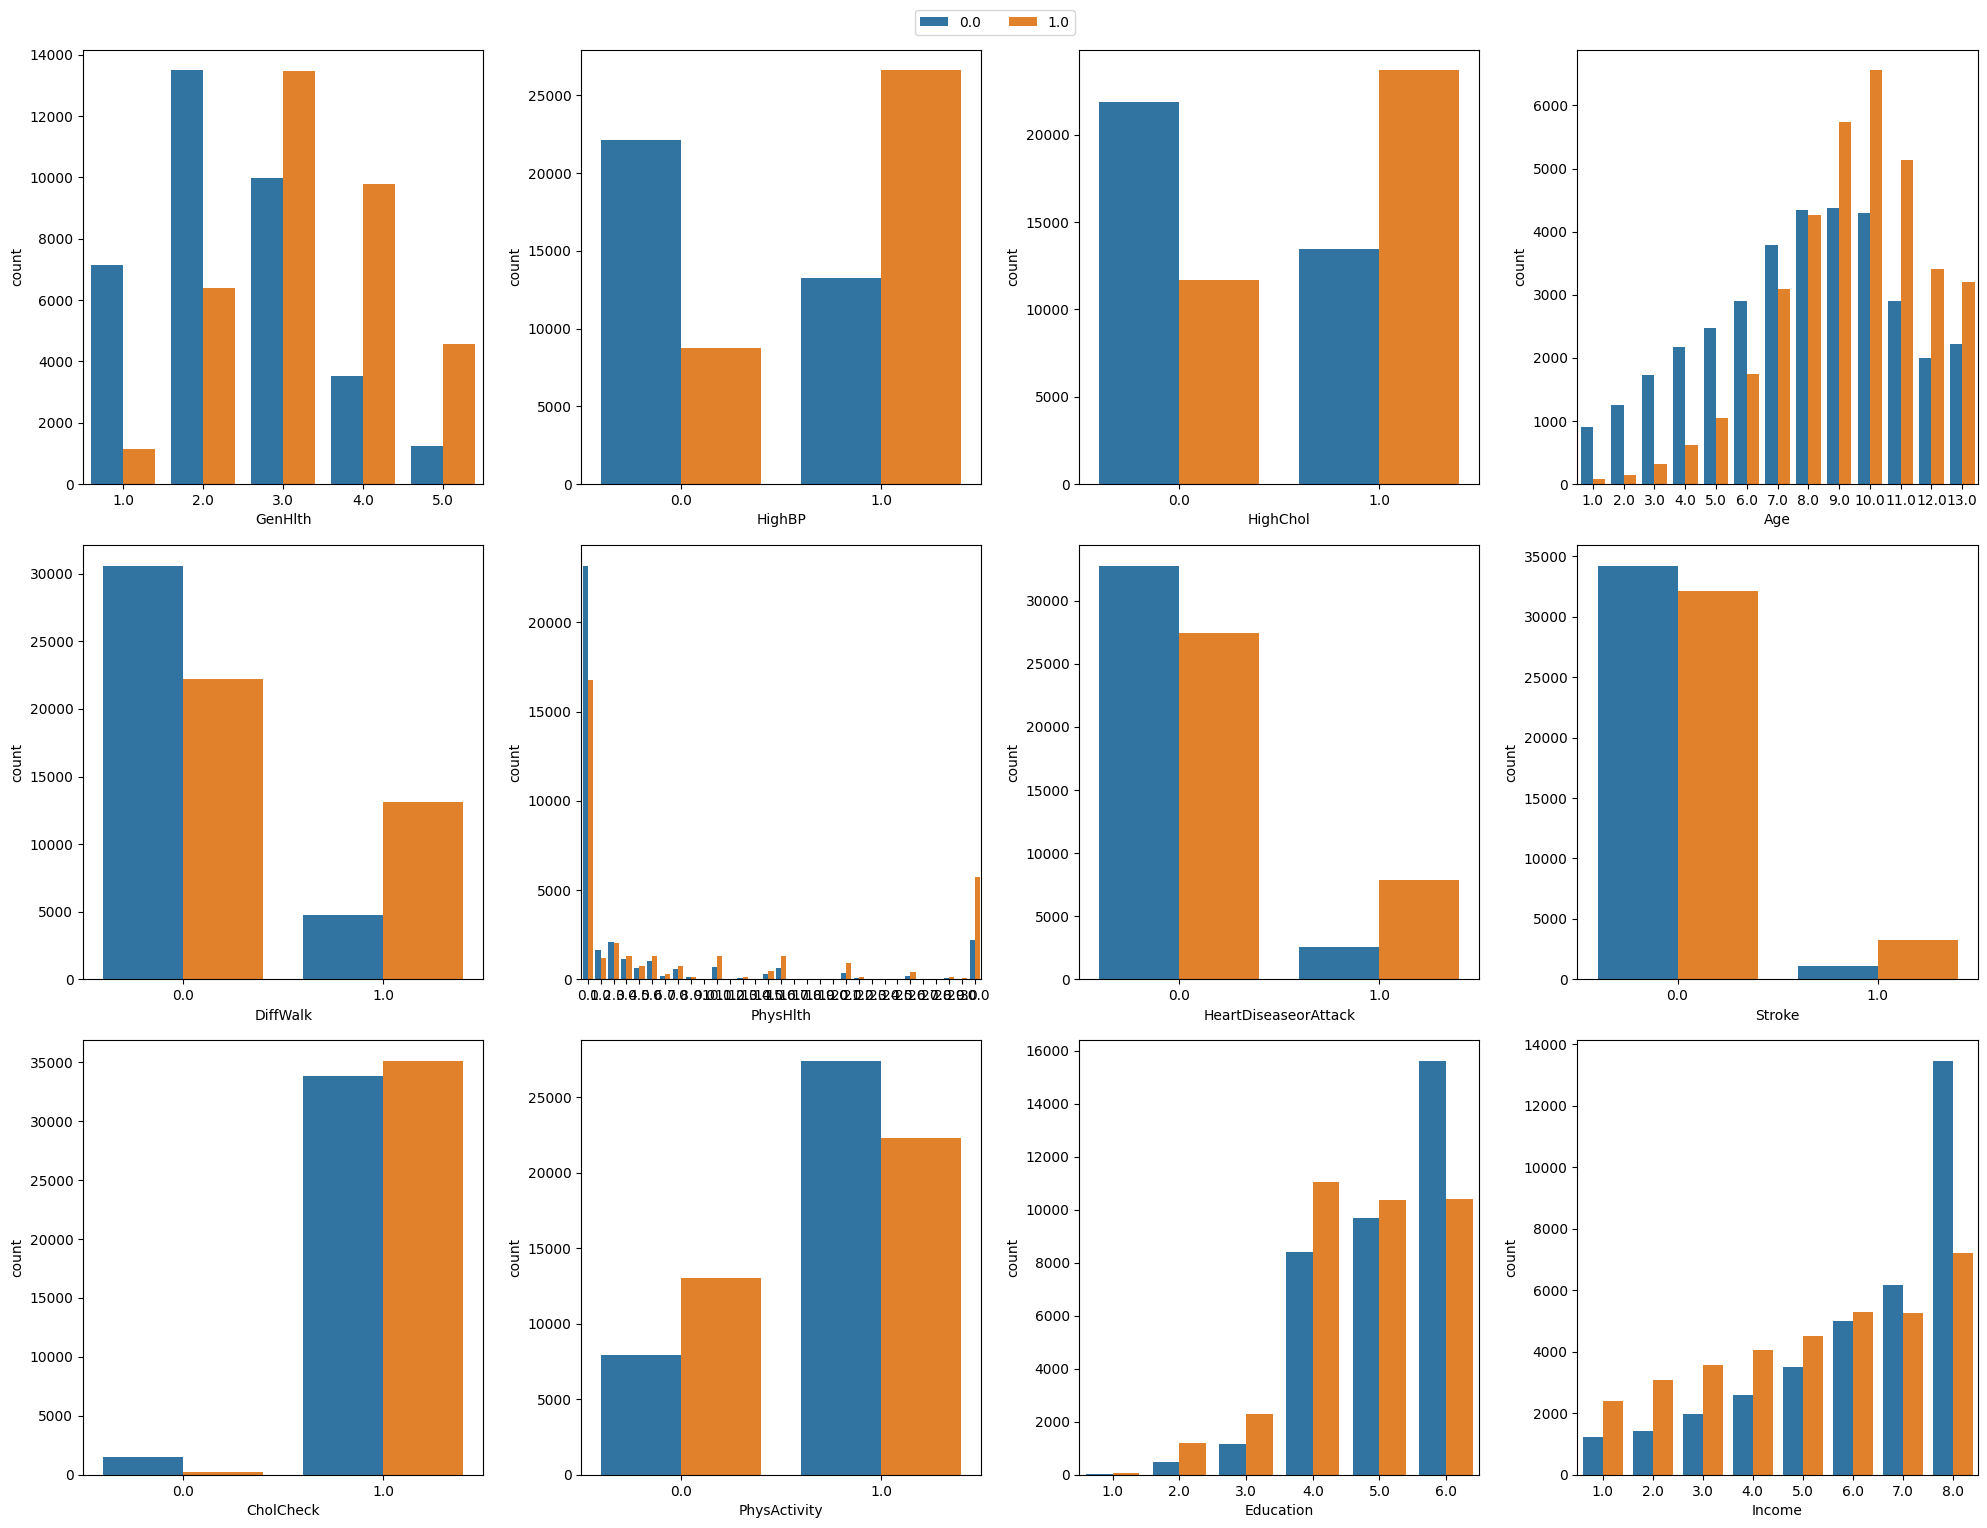

In [64]:
features = ['GenHlth', 'HighBP', 'HighChol', 'Age', 'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack',
            'Stroke', 'CholCheck', 'PhysActivity', 'Education', 'Income']

# TODO: create a figure with 3 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), facecolor='white')

# TODO: iterate over each feature and its corresponding axes object
# to plot the countplot of each feature
for ax, feature in zip(axes.flatten(),features):
    # TODO: plot the countplot of the current feature
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=ax)

    ax.get_legend().remove()

# TODO: show the legend anchored to the upper center
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.02), loc='upper center', ncol=len(labels))

# TODO: set the figure tight layout
plt.tight_layout()

plt.show()


For the numerical features, we will use a similar plot that uses a histogram to visualize the correlation between the numerical features and the target variable. We will use the `histplot()` method of the seaborn library. The `histplot()` method plots univariate histograms to show distributions of datasets. The x-axis represents the feature and the y-axis represents the count of observations. The color of the bars represents the target variable. 

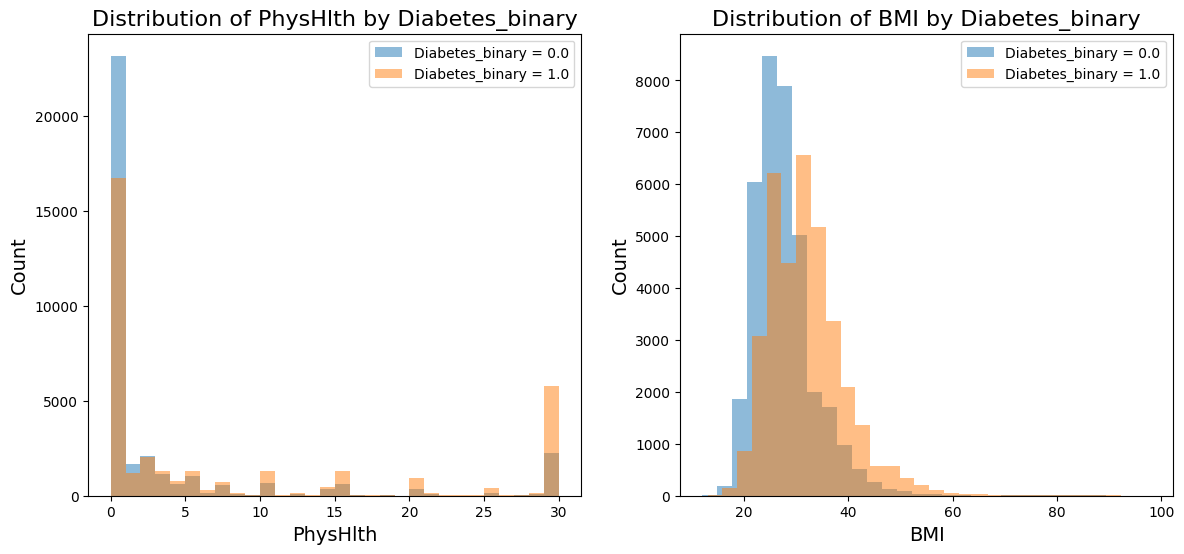

In [65]:
features = ['PhysHlth', 'BMI']

# TODO: create subplots with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), facecolor='white')

target = 'Diabetes_binary'

# TODO: iterate over each column name and its corresponding axes object
# to plot the histogram of each numerical column
for ax, feature in zip(axes.flatten(), (features
)):
    for t in df[target].unique():
        data = df[df[target] == t][feature]
        ax.hist(data, bins=30, alpha=0.5, label=f"{target} = {t}")

    ax.set_ylabel('Count', fontsize=14)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_title(f"Distribution of {feature} by {target}", fontsize=16)
    
    ax.legend()

plt.show()

# Data Preprocessing

Data splitting. We are given one CSV file containing all the data. We will split the data into training, validation, and test sets. 
- The training dataset is used to train the machine learning model. The model learns the patterns and relationships within the data from this set. The model adjusts its parameters to minimize the difference between its predictions and the ground truth values provided with this dataset.
- The validation dataset is used to assess the model's performance during training and guide the adjustment of the hyperparameters. Hyperparameters are training/model configurations that the programmer can manually adjust. Since the validation dataset is an independent dataset not used in directly tuning the model's internal parameters, we can use it to assess whether a model is under-fitting or over-fitting. 
- The test dataset is kept separate from both the training and validation sets. It is used to assess the final performance of the trained model on unseen data. The test set provides an unbiased evaluation of the model's generalization to new, previously unseen examples. 

Building pipelines to preprocess the data. The preprocessing pipeline provides a systematic and efficient way to streamline and automate the data preprocessing steps. It ensures consistent application of preprocessing steps to training, validation, and test data, enhancing model reproducibility, readability, and ease of deployment. In this section, we will build a preprocessing pipeline to perform the following steps:
 - Standardize the data using StandardScaler
 - Keep selected features

Reload the data into a Pandas DataFrame to reset the changes made to the dataframe in the previous section. Additionally, we will declare variables to store all the feature columns and the label (target) columns. 

In [66]:
# TODO: reload the dataset
csv_path = os.path.join('.','dataset/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df = pd.read_csv(csv_path)
bin_cols = [
   'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'  # PROVIDED
]
cat_cols = [
    'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'  # PROVIDED
]
num_cols = [
    'BMI'  # PROVIDED
]
# TODO: create variables to keep track of the features and labels
all_features = bin_cols+cat_cols+num_cols

label = ('Diabetes_binary'
)
# PROVIDED: create list of column names for each data type


Split the data into training, validation, and test sets. The training set will be used to train the model, the validation set will be used to evaluate the model during the training process, and the test set will be used to test the final model.

We will be using Scikit-Learn's `train_test_split` function to split the data into training, validation, and test sets. The `train_test_split` function takes in the dataframe as argument and returns the training set and test set. We will further split the training set into training and validation sets. The final split is 60% training, 20% validation, and 20% test.

In [67]:
# TODO: use a random seed so that we can reproduce the results
# this is important when you want to compare different models in different executions
random_seed = 2508

# TODO: split the data into training and test sets. 80/20 split.
train_set, test_set = (
    train_test_split(df, test_size=0.2, random_state=random_seed)

)

# TODO: split the data into training and validation sets. 
# 75/25 split of the training set, which is 60/20 of the original set.
train_set, valid_set = train_test_split(train_set, test_size=0.25, random_state=random_seed)

Separate the feature columns from the label column

In [68]:
# TODO: separate the features and labels in the training, validation, and test sets
train_X, train_y = train_set.drop(columns=['Diabetes_binary']),train_set['Diabetes_binary']
valid_X, valid_y = valid_set.drop(columns=['Diabetes_binary']),valid_set['Diabetes_binary']
test_X, test_y = test_set.drop(columns=['Diabetes_binary']),test_set['Diabetes_binary']

Check the feature distribution in the training, validation, and test sets. We want to ensure that the label distribution is similar in all the sets.

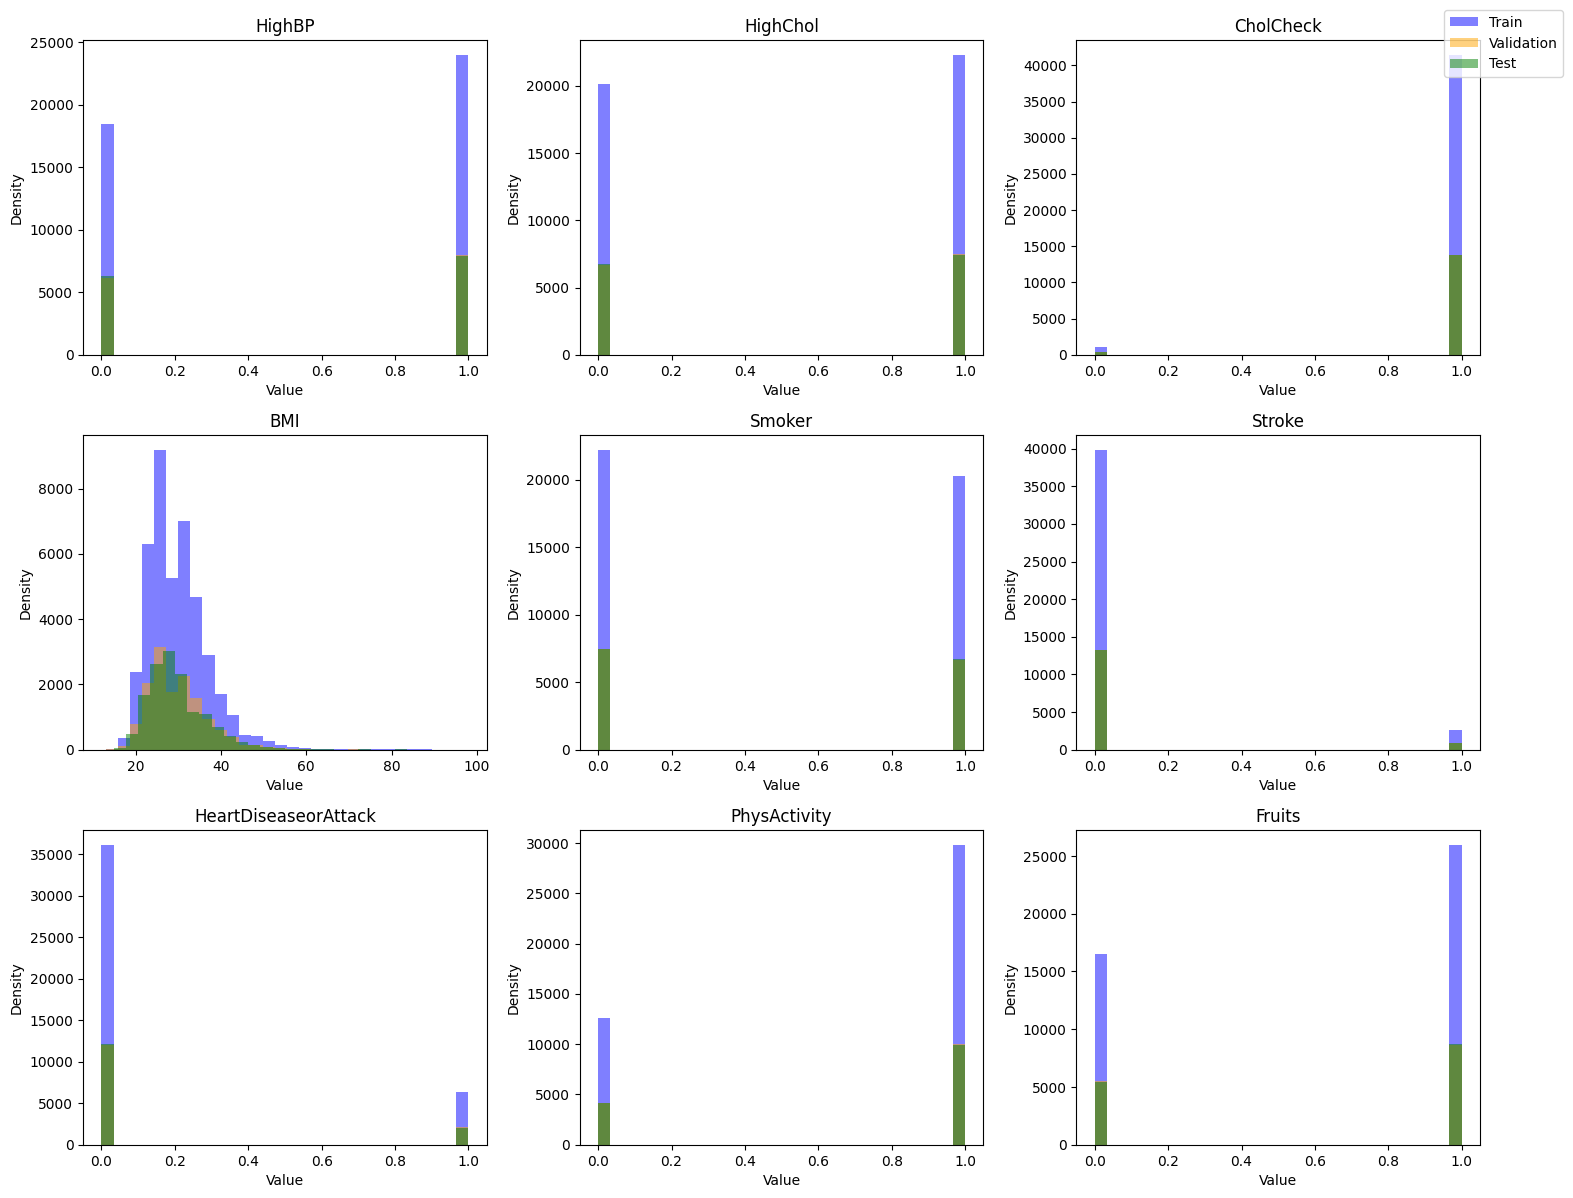

In [69]:
# Check the distribution of the training set, validation set, and test set
# For each feature, overlay the histograms of the three sets on the same subplot

# TODO: create a figure with 3 rows and 7 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
features = train_X.columns


# TODO: for each feature, plot the histograms of the three sets on the same subplot
for ax, col in zip(axes.flat, (features
)):
    # TODO: Plot the histogram for this feature in each of the three sets.
    ax.hist(train_X[col], bins=30, alpha=0.5, label='Train', color='blue')
    ax.hist(valid_X[col], bins=30, alpha=0.5, label='Validation', color='orange')
    ax.hist(test_X[col], bins=30, alpha=0.5, label='Test', color='green')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

    ax.set_title(col)

# TODO: add a legend to the figure anchor to the top right corner
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper right')

# TODO: use `plt.tight_layout()` to adjust the padding between and around subplots.
plt.tight_layout()
plt.show()


Check the label distribution in the training, validation, and test sets. 

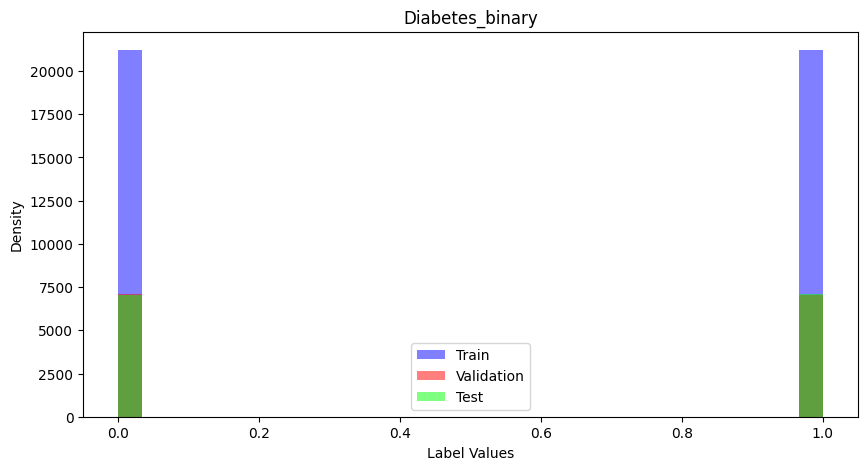

In [70]:
# TODO: check the label distribution of the training set, validation set, and test set
# overlay the histograms of the three sets

plt.figure(figsize=(10, 5))
plt.hist(train_y, bins=30, alpha=0.5, label='Train', color='blue')
plt.hist(valid_y, bins=30, alpha=0.5, label='Validation', color='red')
plt.hist(test_y, bins=30, alpha=0.5, label='Test', color='lime')

plt.xlabel('Label Values')
plt.ylabel('Density')

plt.title(label)
plt.legend()
plt.show()


We will make a copy of the dataframe to use later for checking column order.

In [71]:
# TODO: make a copy of train_X 
train_X_df = train_X.copy()

## Create Preprocessing Pipeline

- Standardize the numerical data using StandardScaler
- Keep selected features

`ColumnTransformer` allows us to apply different preprocessing steps to different columns in the dataset. It is particularly useful when we have a dataset with heterogeneous data types or when we want to apply specific transformations to specific subsets of features.

In [72]:
train_X_df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [73]:
# parameters for the preprocess pipelines
num_features = ['BMI']
passthrough_features = ['HighBP', 'HighChol',  'CholCheck', 'Stroke', 
                        'HeartDiseaseorAttack', 'PhysActivity','GenHlth',
                        'PhysHlth', 'DiffWalk',  'Age', 'Education','Income'
                        ]

# TODO: create a preprocess pipeline
# use StandardScaler() for the numerical features
# use "passthrough" for the features to be kept as is
preprocess_pipeline = ColumnTransformer([('num_features',StandardScaler(),num_features)],remainder='passthrough')


Use the full pipeline to transform the training and validation data

In [74]:
# TODO: fit the pipeline to the training set and transform it
train_X = preprocess_pipeline.fit_transform(train_X_df)

# TODO: transform the validation
valid_X = preprocess_pipeline.fit_transform(valid_X)


We want to verify the order of the columns in the transformed data. The columns should in the same order as the process order of the column transform pipeline. 

The verification is done by checking the values in the columns of the array versus the columns of the dataframe. Therefore, this is only valid for passthrough columns and not for transformed columns. 

In [75]:
feature_names = num_features + passthrough_features

for col_index, f in enumerate(feature_names):
    if(f == 'BMI'):
        print(f'Skipping {f} since it is not a passthorugh column.')
        continue

    is_same = (train_X_df[f] == train_X[:, col_index]).all()
    if(not is_same):
        print(f'{f} and transformed column {col_index} differs')
        break
    

Skipping BMI since it is not a passthorugh column.
Stroke and transformed column 4 differs


# Train and Evaluate Models

This perhaps is the easier part of the workflow in terms of coding. Scikit-learn provides a wide range of machine learning tools that we can use to train and evaluate our data. Their APIs are very consistent. We can use the same code to train and evaluate different models by simply changing the model class.

Before we start, we will implement an evaluation function. This function `predict_and_print_metrics` takes a binary classification model, input features (X), target values (y), and a dataset name. It then predicts the target values using the model, calculates and prints the accuracy, confusion matrix, and a prediction summary (with precision, recall, and f1-score).

Accuracy computes as the proportion of true results (both true positives and true negatives) among the total number of samples. It is calculated as (TP + TN) / (TP + TN + FP + FN).

Precision computes the proportion of predicted positives that are correctly identified. It is calculated as TP / (TP + FP).

Recall computes the proportion of actual positives that are correctly identified. It is calculated as TP / (TP + FN).

F1-score is the harmonic mean of precision and recall. It is calculated as 2 * precision * recall / (precision + recall).

Confusion matrix is a table that summarizes the performance of a classification model. It compares the actual values with the predicted values. It has four entries: true negatives (TN), false negatives (FN), true positives (TP), and false positives (FP). It is shown as:

| TN | FP |
|----|----|
| FN | TP |



In [76]:
#TODO: import the accuracy_score, confusion_matrix, precision_score, recall_score, and f1_score functions
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(cm: np.ndarray, classes: list, cmap=plt.cm.Blues) -> None:
    """
    This function plots the confusion matrix using seaborn.
    """
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# TODO: create a function to predict the target values and print the metrics
# include accuracy, precision, recall, f1 score, and confusion matrix
def predict_and_print_metrics(model, X: np.ndarray, y: np.ndarray, name: str) -> None:
    # predict the target values
    y_pred = model.predict(X)

    # compute accuracy
    accuracy = accuracy_score(y,y_pred)

    # compute confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Compute precision
    precision = precision_score(y, y_pred)

    # compute recall
    recall = recall_score(y, y_pred)

    # Compute f1 score
    f1 = f1_score(y, y_pred)


    print(f"{name}")
    print(f"Accuracy: {accuracy:.4f}")
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print(f"Confusion Matrix:\n")
    plot_confusion_matrix(cm, ['No Diabetes', 'Diabetes'])

Train a Decision Tree Classifier model. The training can be done in three lines of code. First, we import the model class from the Scikit-Learn library. Then, we create an instance of the model class. Third, we call the `fit` method of the model instance to train the model. The `fit` method takes in the training features and labels as arguments. The model learns the patterns and relationships within the data. Then, we use the trained model to predict the target values for the training and validation set, and we evaluate the model using the evaluation metrics mentioned above.

Training Set Evaluation:
Training Set
Accuracy: 0.7116
Precision: 0.6656
Recall: 0.8501
F1 Score: 0.7466
Confusion Matrix:



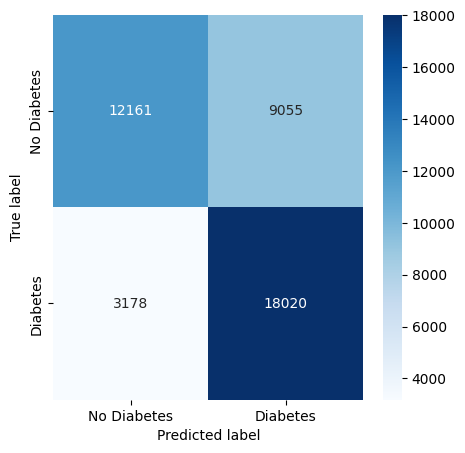


Validation Set Evaluation:
Validation Set
Accuracy: 0.7149
Precision: 0.6693
Recall: 0.8487
F1 Score: 0.7484
Confusion Matrix:



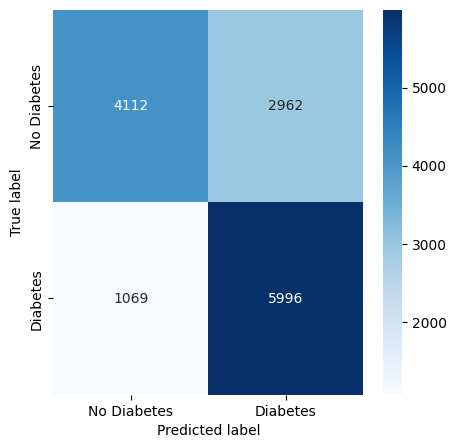

In [77]:
# TODO: import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier


# TODO: instantiate and train the model
tree_clf = DecisionTreeClassifier(max_depth=3,random_state=42)  # You can set other hyperparameters here

tree_clf.fit(train_X, train_y)  # train_X and train_y are your training features and labels
# TODO: evaluate the model on the training set
print("Training Set Evaluation:")
predict_and_print_metrics(tree_clf, train_X, train_y, "Training Set")

# TODO: evaluate the model on the validation set
print("\nValidation Set Evaluation:")
predict_and_print_metrics(tree_clf, valid_X, valid_y, "Validation Set")


We can plot the decision tree to examine the decision making process. Use `plot_tree` method of the classifier.

Each node of the tree shows 
- The feature that is considered and the splitting value of the feature.
- The purity or impurity of the node in terms of class values
- Training samples that satisfy all condition leading to this node
- Within those training samples, how many samples are in each class
- Dominant class of this node


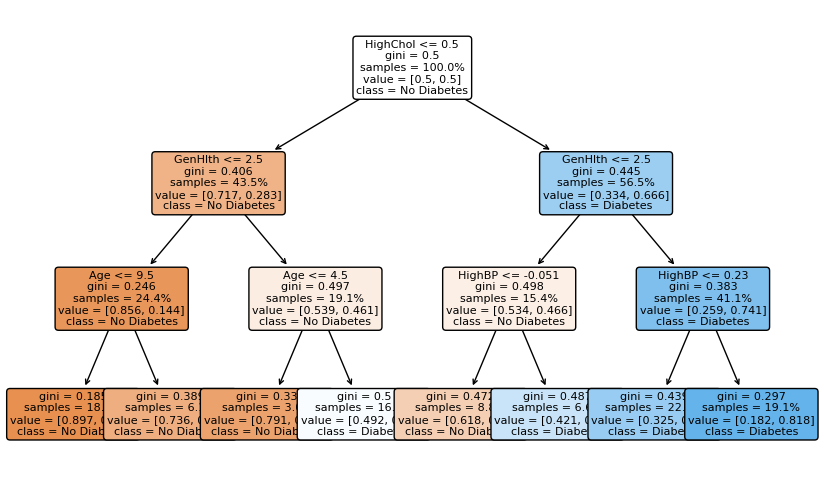

In [78]:

from sklearn.tree import plot_tree

# TODO: Plot the decision tree to visualize the decision making process
plt.figure(figsize=(10, 6))

plot_tree(tree_clf, 
          feature_names=train_X_df.columns,  
          class_names=['No Diabetes', 'Diabetes'],  
          filled=True, 
          rounded=True,  
          proportion=True,  
          impurity=True,  
          fontsize=8)  

# Show the plot
plt.show()


We will train and evaluate other models (K-Nearest Neighbors Classifier and Logistic Regression). We will use the same code to train and evaluate different models by simply changing the model class.

Training
Accuracy: 0.7949
Precision: 0.7824
Recall: 0.8168
F1 Score: 0.7992
Confusion Matrix:



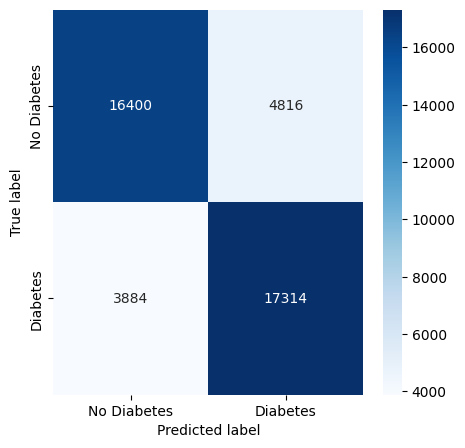

Validation
Accuracy: 0.7034
Precision: 0.6957
Recall: 0.7224
F1 Score: 0.7088
Confusion Matrix:



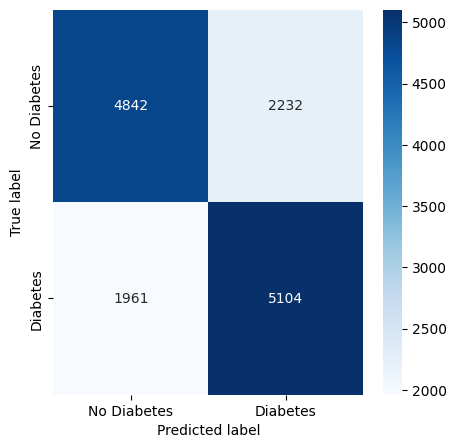

In [79]:
# TODO: import the k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier


# TODO: instantiate and train the model
neigh = KNeighborsClassifier()

# TODO: evaluate the model on the training set and validation set

# Fit the model to the training data
neigh.fit(train_X, train_y)


# TODO: evaluate the model on the training set and validation set

predict_and_print_metrics(neigh, train_X, train_y, "Training")
predict_and_print_metrics(neigh, valid_X, valid_y, "Validation")


Training Set
Accuracy: 0.7465
Precision: 0.7369
Recall: 0.7664
F1 Score: 0.7514
Confusion Matrix:



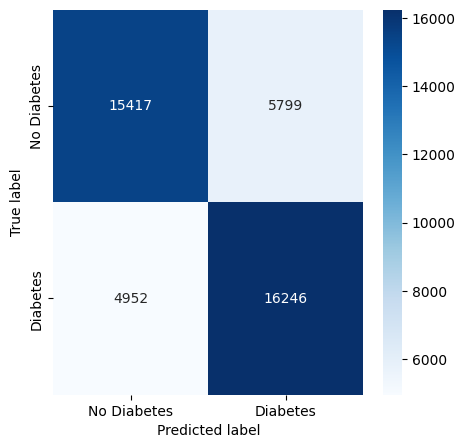

Validation Set
Accuracy: 0.7497
Precision: 0.7408
Recall: 0.7677
F1 Score: 0.7540
Confusion Matrix:



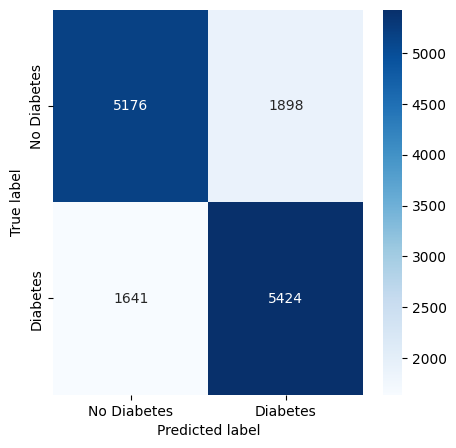

In [80]:
# TODO: import the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# TODO: instantiate and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000) 

# Train the model on the training data
log_reg.fit(train_X, train_y)

# TODO: evaluate the model on the training set
predict_and_print_metrics(log_reg, train_X, train_y, "Training Set")

# TODO: evaluate the model on the validation set
predict_and_print_metrics(log_reg, valid_X, valid_y, "Validation Set")


In the case where the model has hyperparameters, we can either write our own code to search for the best hyperparameters or use Scikit-Learn's `GridSearchCV` class to search for the best hyperparameters. We start off by writing our own code to search for the best hyperparameters.

depth: 2, train score: 0.6987551280237657, valid score: 0.7032321946389419
depth: 4, train score: 0.729287499410572, valid score: 0.7303203904095056
depth: 6, train score: 0.7414297166030085, valid score: 0.7359077728269326
depth: 8, train score: 0.7562597255623144, valid score: 0.742414597920645
depth: 10, train score: 0.772386476163531, valid score: 0.7356955937477898
depth: 12, train score: 0.8014334889423304, valid score: 0.7269962515029351
depth: 14, train score: 0.838237374451832, valid score: 0.7103048306103685
depth: 16, train score: 0.8806761918234545, valid score: 0.6891576490558031
depth: 18, train score: 0.9196963266845852, valid score: 0.6745880189546644
depth: 20, train score: 0.9491441505163389, valid score: 0.669142089256666
depth: 22, train score: 0.9689725090771915, valid score: 0.6629888959615249
depth: 24, train score: 0.9804781440090536, valid score: 0.6598769361340971
depth: 26, train score: 0.9880699768944217, valid score: 0.6587453143786689
depth: 28, train scor

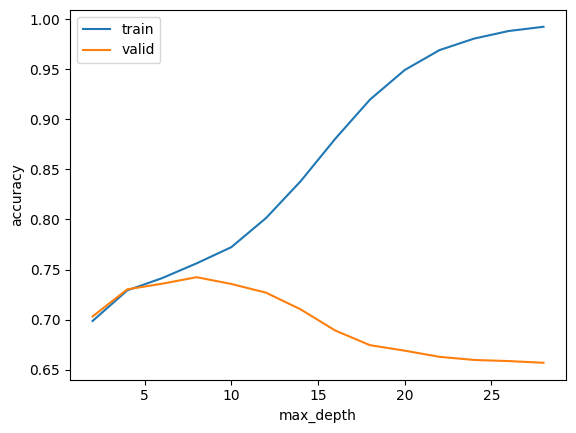

In [81]:
# train a decision tree classifier and search for the best hyperparameters

train_scores = []
valid_scores = []
depths = range(2,30,2)
for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=random_seed)
    tree_clf.fit(train_X, train_y)

    # evaluate the model on the train set
    train_y_pred = tree_clf.predict(train_X)
    train_acc = accuracy_score(train_y, train_y_pred)
    train_scores.append(train_acc)

    # evaluate the model on the validation set
    valid_y_pred = tree_clf.predict(valid_X)
    valid_acc = accuracy_score(valid_y, valid_y_pred)
    valid_scores.append(valid_acc)

# plot the learning curves
plt.plot(depths, train_scores, label='train')
plt.plot(depths, valid_scores, label='valid')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# print the depths and the corresponding scores
for depth, train_score, valid_score in zip(depths, train_scores, valid_scores):
    print(f'depth: {depth}, train score: {train_score}, valid score: {valid_score}')

Use `GridSearchCV` to search for the best hyperparameters. `GridSearchCV` takes in the model class, hyperparameter grid, evaluation metric (scorer), and the number of folds as arguments. It then searches for the best hyperparameters based on the evaluation metric. We will use the same evaluation metric as before, accuracy. We will combine the training and evaluation data into one dataset. This is because `GridSearchCV` uses cross-validation to evaluate the model. We will use 5-fold cross-validation, which means that the dataset will be split into 5 folds. The model will be trained and evaluated 5 times, each time using a different fold as the evaluation set. The final evaluation metric will be the average of the 5 evaluations.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# PROVIDED: combine the train and validation sets for GridSearchCV
train_valid_X = np.concatenate([train_X, valid_X])  # PROVIDED
train_valid_y = np.concatenate([train_y, valid_y])  # PROVIDED


# TODO: Specify the parameter grid for the grid search
param_grid = {
    'max_depth': range(1,100,1),
}


# TODO: Make the metric a scorer using make_scorer
scorer = make_scorer(accuracy_score, greater_is_better=True)


# TODO: Create the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the GridSearchCV object with custom scoring
grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5  # Use 5-fold cross-validation
)

# TODO: Fit the grid search to your data

grid_search.fit(train_valid_X, train_valid_y)

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the results
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")

# You can also access other information like grid search results, etc.
best_index = grid_search.best_index_
print(grid_search.cv_results_['mean_test_score'])

Best Model: DecisionTreeClassifier(max_depth=8, random_state=42)
Best Parameters: {'max_depth': 8}
[0.68698388 0.69987458 0.71244679 0.72786598 0.73034151 0.73564628
 0.73902359 0.73912976 0.73564629 0.73348904 0.72844956 0.72135882
 0.71644315 0.70401236 0.69883127 0.69018451 0.68068907 0.67543732
 0.66940759 0.66445645 0.66231693 0.65915176 0.65687066 0.65690601
 0.65653477 0.65407688 0.65374084 0.65361708 0.65480184 0.65412993
 0.65370554 0.65439515 0.65494329 0.65473114 0.65490796 0.65483723
 0.65497869 0.65462503 0.65439516 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844 0.65398844
 0.65398844 0.65398844 0.65398

# Putting it all together in a pipeline and export pipeline

We will now combine the preprocessing pipeline and the best model into one pipeline. 

In [83]:
# TODO: combine the preprocessing pipeline and the best model into a new pipeline
pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', best_model)
])

Save the pipeline using `joblib.dump` and load it back for predicting the test set

In [84]:
# TODO: save the pipeline
import joblib

joblib.dump(pipeline, './pipelines/diabetus_price_pipeline.joblib')

['./pipelines/diabetus_price_pipeline.joblib']

Test
Accuracy: 0.7436
Precision: 0.7429
Recall: 0.7466
F1 Score: 0.7447
Confusion Matrix:



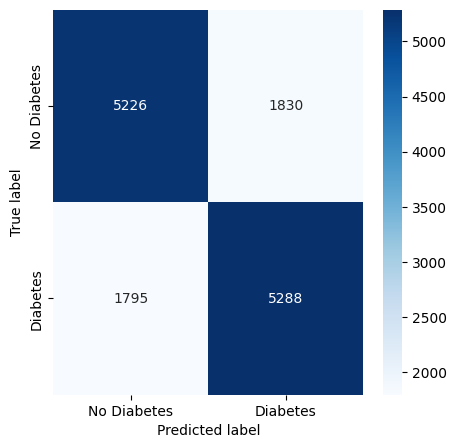

In [85]:
# TODO: load the pipeline
pipeline = joblib.load('./pipelines/diabetus_price_pipeline.joblib')

# TODO: evaluate the pipeline on the test set
predict_and_print_metrics(pipeline, test_X, test_y, 'Test')
